<a href="https://colab.research.google.com/github/sbutori/m10-s08-inteli/blob/main/Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Animal Pose Estimation

## Importar o Dataset

*1 - Obtenha o dataset ANIMAL-POSE DATASET (https://sites.google.com/view/animal-pose/)*

In [1]:
import gdown

# Link compartilhado do Google Drive do keypoints.json
drive_link = 'https://drive.google.com/file/d/1bAidtvR3MttetncXz0mfr47vYy7Uf5hm/view?usp=drive_link'

# Extrair o ID do arquivo do link
file_id = drive_link.split('/')[5]

# Formar o link direto
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baixar o arquivo
output = 'keypoints.json'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bAidtvR3MttetncXz0mfr47vYy7Uf5hm
To: /content/keypoints.json
100%|██████████| 2.36M/2.36M [00:00<00:00, 84.7MB/s]


'keypoints.json'

In [2]:
# Link compartilhado do Google Drive do images.zip
drive_link = 'https://drive.google.com/file/d/1Ge9jZppE9pGxqVyNAh6bWh4_ukffWBlF/view?usp=drive_link'

# Extrair o ID do arquivo do link
file_id = drive_link.split('/')[5]

# Formar o link direto
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baixar o arquivo
output = 'images.zip'
gdown.download(download_url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Ge9jZppE9pGxqVyNAh6bWh4_ukffWBlF
From (redirected): https://drive.google.com/uc?id=1Ge9jZppE9pGxqVyNAh6bWh4_ukffWBlF&confirm=t&uuid=765fdc1a-eca3-4755-8098-9746992c657b
To: /content/images.zip
100%|██████████| 368M/368M [00:05<00:00, 67.8MB/s]


'images.zip'

In [3]:
import zipfile
import os

# Nome do arquivo baixado
zip_file = 'images.zip'

# Descompactar o arquivo
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('.')

print(f'Arquivos descompactados.')

Arquivos descompactados.


## Transformar o keypoints.json em um Dataframe pandas


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo JSON
with open('keypoints.json') as file:
    data = json.load(file)

# Extrair informações do JSON
images = data['images']
annotations = data['annotations']
categories = data['categories']

# Converter para DataFrames
images_df = pd.DataFrame(images.items(), columns=['image_id', 'file_name'])
annotations_df = pd.DataFrame(annotations)
categories_df = pd.DataFrame(categories)

# Ajustar o nome da coluna 'id' para 'category_id' em categories_df
categories_df = categories_df.rename(columns={'id': 'category_id'})
print(categories_df.dtypes)

# Certifique-se de que as chaves têm o mesmo tipo de dado
images_df['image_id'] = images_df['image_id'].astype(int)
annotations_df['image_id'] = annotations_df['image_id'].astype(int)

# Mesclar os DataFrames
merged_df = pd.merge(annotations_df, images_df, on='image_id')
merged_df = pd.merge(merged_df, categories_df, on='category_id')

# Excluir animais duplicados nas imagens
merged_df = merged_df.drop_duplicates(subset=['image_id', 'name'])

# Usar o id da imagem como index do Dataframe
merged_df.sort_values(by='image_id', inplace=True)



supercategory    object
category_id       int64
name             object
keypoints        object
skeleton         object
dtype: object


In [5]:
merged_df.dtypes

image_id          int64
bbox             object
keypoints_x      object
num_keypoints     int64
category_id       int64
file_name        object
supercategory    object
name             object
keypoints_y      object
skeleton         object
dtype: object

In [6]:
merged_df

,image_id,bbox,keypoints_x,num_keypoints,category_id,file_name,supercategory,name,keypoints_y,skeleton
0,1,"[123, 115, 379, 275]","[[193, 216, 1], [160, 217, 1], [174, 261, 1], ...",20,1,2007_000063.jpg,animal,dog,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
1771,2,"[25, 34, 419, 271]","[[330, 84, 1], [245, 91, 1], [290, 137, 1], [3...",20,3,2007_000175.jpg,animal,sheep,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
2849,3,"[54, 50, 285, 262]","[[275, 102, 1], [247, 105, 1], [269, 156, 1], ...",20,4,2007_000332.jpg,animal,horse,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
2850,4,"[100, 96, 355, 324]","[[0, 0, 0], [327, 161, 1], [350, 192, 1], [333...",20,4,2007_000392.jpg,animal,horse,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3809,5,"[71, 252, 216, 314]","[[103, 269, 1], [86, 269, 1], [92, 284, 1], [1...",20,5,2007_000464.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
...,...,...,...,...,...,...,...,...,...,...
2844,4604,"[33, 63, 547, 559]","[[119, 140, 1], [0, 0, 0], [48, 183, 1], [158,...",20,3,sh95.jpg,animal,sheep,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
2845,4605,"[119, 50, 729, 594]","[[656, 113, 1], [0, 0, 0], [580, 181, 1], [683...",20,3,sh96.jpg,animal,sheep,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
2846,4606,"[105, 38, 565, 598]","[[250, 91, 1], [166, 91, 1], [214, 148, 1], [2...",20,3,sh97.jpg,animal,sheep,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
2847,4607,"[65, 54, 263, 202]","[[245, 93, 1], [210, 94, 1], [232, 115, 1], [2...",20,3,sh98.jpeg,animal,sheep,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."


## Gráficos e Descrições Textuais

*1 - e faça uma análise exploratória, de forma a apresentar gráficos, suas descrições textuais e destacar quantas imagens do dataset são de bovinos;*

Vamos começar visualizando a distribuição das categorias de animais no dataset. Para isso, um gráfico de barras pode ser utilizado.


### Distribuição de Categorias

O gráfico de barras abaixo mostra a distribuição das diferentes categorias de animais no dataset. Cada barra representa o número de imagens associadas a cada categoria.

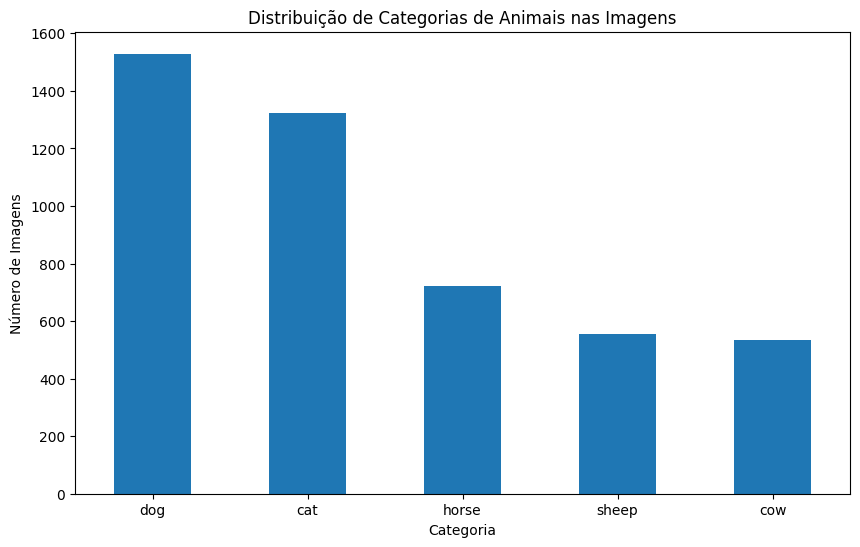

In [7]:
import matplotlib.pyplot as plt

# Contagem das categorias
category_counts = merged_df.drop_duplicates(subset=['image_id', 'name'])
category_counts = category_counts['name'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribuição de Categorias de Animais nas Imagens')
plt.xlabel('Categoria')
plt.ylabel('Número de Imagens')
plt.xticks(rotation=0)
plt.show()

Descrição textual do gráfico: temos aproximadamente 1500 imagens de cachorros, 1300 images de gatos, 700 de cavalos, 500 de ovelhas e 500 de bovinos no dataset.

### Imagens de Bovinos

*2 - Faça a filtragem do dataset para que somente imagens de bovinos sejam processados*

Agora, vamos focar nas imagens que contêm bovinos.

In [8]:
# Filtrar para bovinos (nome: 'cow')
bovines_df = merged_df[merged_df['name'] == 'cow']

# Número de imagens contendo bovinos
num_bovine_images = bovines_df['image_id'].nunique()

print(f'Número exato de imagens contendo bovinos: {num_bovine_images}')

Número exato de imagens contendo bovinos: 534


In [9]:
bovines_df.head()

,image_id,bbox,keypoints_x,num_keypoints,category_id,file_name,supercategory,name,keypoints_y,skeleton
3809,5,"[71, 252, 216, 314]","[[103, 269, 1], [86, 269, 1], [92, 284, 1], [1...",20,5,2007_000464.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3811,6,"[2, 2, 459, 334]","[[0, 0, 0], [255, 46, 1], [308, 88, 1], [171, ...",20,5,2007_000491.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3812,7,"[341, 102, 500, 406]","[[363, 125, 1], [0, 0, 0], [343, 147, 1], [385...",20,5,2007_000504.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3813,16,"[237, 167, 338, 263]","[[248, 205, 1], [0, 0, 0], [238, 222, 1], [254...",20,5,2007_000904.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3814,18,"[55, 178, 149, 248]","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",20,5,2007_001073.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."


*2 - , e descreva as etapas de processamento de imagem realizados por meio de uma figura ilustrativa do processo
Figura ilustrativa do processo:*


Baixar o dataset com as imagens -> Processar o dataset para transformar o arquivo keypoints.json em um DataFrame Pandas -> Fazer um gráfico destacando quantas imagens estão contidas em cada grupo usando o matplotlib -> Filtrar o DataFrame para que só contenha imagens de bovinos e contar quantos registros permanecem

*e um exemplo detalhado passo-a-passo;*


Um exemplo detalhado passo-a-passo pode ser observado nos itens anteriores.

## Resultados Finais do Processamento

*3 - Apresente os resultados finais do processamento feito com gráficos/tabelas e suas descrições textuais, de forma a resumir os principais resultados obtidos;*

### Tabela 1 - Conjunto de dados final processado

Descrição textual: temos 534 imagens contendo bovinos, com o bounding box (bbox) delimitando onde está o animal na imagem (vetor com coordenadas [x inicial, y inicial, x final, y final]), número de keypoints (num_keypoints), id da categoria do animal (5), nome do arquivo (file_name), categoria "pai" (supercategory), nome da categoria ("cow"), coordenadas dos keypoints (keypoints_x, sendo um vetor [x, y, 1]) e o que cada keypoint reresenta (keypoints_y) e a descrição de como esses keypoints estão conectados (skeleton).

In [10]:
bovines_df.head()

,image_id,bbox,keypoints_x,num_keypoints,category_id,file_name,supercategory,name,keypoints_y,skeleton
3809,5,"[71, 252, 216, 314]","[[103, 269, 1], [86, 269, 1], [92, 284, 1], [1...",20,5,2007_000464.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3811,6,"[2, 2, 459, 334]","[[0, 0, 0], [255, 46, 1], [308, 88, 1], [171, ...",20,5,2007_000491.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3812,7,"[341, 102, 500, 406]","[[363, 125, 1], [0, 0, 0], [343, 147, 1], [385...",20,5,2007_000504.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3813,16,"[237, 167, 338, 263]","[[248, 205, 1], [0, 0, 0], [238, 222, 1], [254...",20,5,2007_000904.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."
3814,18,"[55, 178, 149, 248]","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",20,5,2007_001073.jpg,animal,cow,"[left_eye, right_eye, nose, left_ear, right_ea...","[[0, 1], [0, 2], [1, 2], [0, 3], [1, 4], [2, 1..."


### Tabela 2 - Análise Exploratória do Conjunto de dados

No dataset, temos aproximadamente 1500 imagens de cachorros, 1300 images de gatos, 700 de cavalos, 500 de ovelhas e 500 de bovinos no dataset.

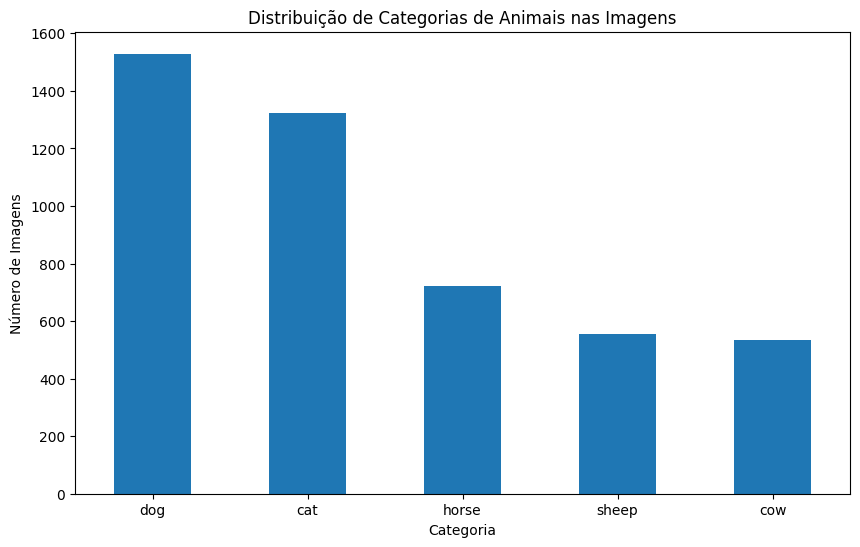

In [11]:
import matplotlib.pyplot as plt

# Contagem das categorias
category_counts = merged_df.drop_duplicates(subset=['image_id', 'name'])
category_counts = category_counts['name'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribuição de Categorias de Animais nas Imagens')
plt.xlabel('Categoria')
plt.ylabel('Número de Imagens')
plt.xticks(rotation=0)
plt.show()